In [1]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd

import nibabel as nib
from nilearn import datasets, plotting

from statsmodels.stats.multitest import multipletests

sys.path.append('../general_functions/')
from plotting_brains_surfplot import (
    map_values_to_atlas,
    make_translucent_map,
    Plot)

fsaverage = datasets.fetch_surf_fsaverage()


/Users/f004p59/.local/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/Users/f004p59/.local/lib/python3.7/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
from surfplot.surf import plot_surf
#from surfplot import Plot -- importing modified Class
from brainspace.datasets import load_parcellation
from brainspace.mesh.mesh_io import read_surface
from neuromaps.datasets import fetch_fslr

surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
atlas_surf = load_parcellation('schaefer', 100, join = True)

#DEFINING THE COLOR MAPS
from matplotlib.colors import LinearSegmentedColormap

basic_cols=['k', 'k', 'k']
black_cmap=LinearSegmentedColormap.from_list('mycmap', basic_cols)

basic_cols=['blue', 'blue', 'blue']
blue_cmap=LinearSegmentedColormap.from_list('mycmap', basic_cols)

homemade_diverging_purple = LinearSegmentedColormap.from_list('homemade_diverging', (
    # Edit this gradient at https://eltos.github.io/gradient/#homemade_diverging=169076-FFFFFF-341177
    (0.000, (0.086, 0.565, 0.463)),
    (0.500, (1.000, 1.000, 1.000)),
    (1.000, (0.204, 0.067, 0.467))))


In [6]:

threshold = .05
bad_ROIs = [30, 31, 32, 78, 79]  # Indices to exclude
significant_nodes_per_iteration = []

for ite in range(1, num_iterations + 1):
    # Read the data for the current iteration
    all_sub = pd.read_csv(f'model_outputs/lmer_results_compare_segments_matched_length_iteration_nuisanceCRM_subcortical{ite}.csv')
    all_sub = all_sub.reset_index()
    
    # Extract the original values and p-values
    vals = np.array(all_sub['Estimate'])
    p_vals = np.array(all_sub['P_Value'])
    
    # Determine the indices to correct (excluding bad_ROIs)
    indices_to_correct = [i for i in range(len(p_vals)) if i not in bad_ROIs]
    selected_p_vals = p_vals[indices_to_correct]
    
    # Apply FDR correction only to the selected p-values
    q_corrected = multipletests(selected_p_vals, method='fdr_bh')[1]
    
    # Map corrected values back to their original positions
    corrected_p_vals = np.full_like(p_vals, np.nan)  # Initialize with NaN
    corrected_p_vals[indices_to_correct] = q_corrected  # Fill corrected values
    
    # Print the number of significant values
    print(f"{np.sum(corrected_p_vals < threshold)} significant values, q = {threshold}")
    
    # Replace estimates with NaN where corrected p-values are above the threshold
    vals[corrected_p_vals >= threshold] = np.nan
    
    # Identify significant nodes
    significant_nodes = set(all_sub.index[corrected_p_vals < threshold])
    significant_nodes_per_iteration.append(significant_nodes)

# Find the intersection of all sets of significant nodes
if significant_nodes_per_iteration:
    common_significant_nodes = set.intersection(*significant_nodes_per_iteration)
    print("Nodes significant in all iterations:", common_significant_nodes)
else:
    print("No iterations found.")


61 significant values, q = 0.05
62 significant values, q = 0.05
61 significant values, q = 0.05
61 significant values, q = 0.05
62 significant values, q = 0.05
63 significant values, q = 0.05
63 significant values, q = 0.05
61 significant values, q = 0.05
63 significant values, q = 0.05
64 significant values, q = 0.05
63 significant values, q = 0.05
64 significant values, q = 0.05
63 significant values, q = 0.05
65 significant values, q = 0.05
65 significant values, q = 0.05
63 significant values, q = 0.05
62 significant values, q = 0.05
61 significant values, q = 0.05
62 significant values, q = 0.05
63 significant values, q = 0.05
64 significant values, q = 0.05
67 significant values, q = 0.05
66 significant values, q = 0.05
64 significant values, q = 0.05
65 significant values, q = 0.05
64 significant values, q = 0.05
64 significant values, q = 0.05
64 significant values, q = 0.05
64 significant values, q = 0.05
64 significant values, q = 0.05
63 significant values, q = 0.05
62 signi

In [7]:
### For the purposes of replicability, we are defining these here. The code for how we checked each iteration is in this folder.
common_significant_nodes_relabeled = [2, 6, 7, 14, 15, 16, 17, 19, 21, 23, 26, 33, 34, 35, 36, 40, 44, 46, 47, 49, 52, 56, 57, 66, 68, 69, 70, 71, 72, 73, 74, 80, 81, 82, 83, 85, 86, 88, 89, 90, 94, 95, 96, 97, 99, 100]


In [8]:
num_iterations = 178

In [9]:
all_sub = pd.read_csv('model_outputs/' + "lmer_across_node_estimate_pre_post_twist_new.csv")
all_sub.head(5) #loading in the values from the 1.3, comparing all of the pre-twist and post-twist timepoints
vals = all_sub['estimate']
#filtering them by what is significant in all models!


In [10]:

mask = all_sub['node'].isin(common_significant_nodes)
p_values = np.array(all_sub['p'])

# Replace p-values not corresponding to 'True' in the mask with np.nan
filtered_p_values = np.where(mask, p_values, np.nan)
all_sub['vals_sig'] = filtered_p_values

/Users/f004p59/miniconda3/envs/brainiak_py37/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
/Users/f004p59/.local/lib/python3.7/site-packages/nilearn/image/resampling.py:852: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(img, data, affine)


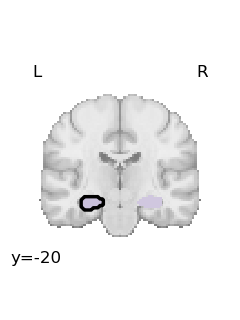

In [11]:
# First plot the hippocampus 

atlas_name = 'sub-maxprob-thr0-2mm'
harvard_oxford = datasets.fetch_atlas_harvard_oxford(atlas_name)

atlas = harvard_oxford.maps

hippocampus_indices = [9, 19]
hippocampus_indices = [9, 19]  

hippocampus_mask_L = (atlas.get_fdata() == hippocampus_indices[0]).astype(int)
hippocampus_mask_R = (atlas.get_fdata() == hippocampus_indices[1]).astype(int)

# Combine masks into one
combined_mask = np.zeros(atlas.shape)
combined_mask[hippocampus_mask_L == 1] = vals[100]
combined_mask[hippocampus_mask_R == 1] = vals[101]

# Create a new Nifti image for the combined mask
combined_img = nib.Nifti1Image(combined_mask, atlas.affine)

# # # # ADD THE contour! --left hemisphere

display = plotting.plot_stat_map(combined_img, display_mode='y', cut_coords=[-20], colorbar=False, cmap=homemade_diverging_purple,vmax=.025)

#display.add_contours(nib.Nifti1Image(hippocampus_mask_R, atlas.affine), levels=[0.5], colors='black', linewidths=2.5)
display.add_contours(nib.Nifti1Image(hippocampus_mask_L, atlas.affine), levels=[0.5], colors='black', linewidths=2.5)
display.savefig('../../plots/Fig1._situationmodel/pre-post-twist_fig_hippocampus.png', dpi=300)
plotting.show()

In [12]:
bad_ROIs = [30, 31, 32, 78, 79]
threshold = 0.05

vals = np.array(list(all_sub['estimate']))
p_vals = np.array(list(all_sub['p']))

#filter out the bad ROIs
for idx, a in enumerate(vals):
    if idx in bad_ROIs:
        vals[idx] = np.nan

# Identify significant indices for p-values at the threshold
significant_p_indices = np.where(p_vals < threshold)[0]
# Exclude any bad ROIs from the significant indices
significant_p_indices = [idx for idx in significant_p_indices if idx not in bad_ROIs]

# Perform FDR correction for q-values
q_vals = multipletests(p_vals, method='fdr_bh')[1]
significant_q_indices = np.where(q_vals < threshold)[0]
# Exclude any bad ROIs from the significant q-value indices
significant_q_indices = [idx for idx in significant_q_indices if idx not in bad_ROIs]

p_regions = [idx for idx in significant_p_indices]  
q_regions = [idx for idx in significant_q_indices]  


print(f"Indices of significant values at p < {threshold}: {p_regions}")
print(f"Indices of significant values at q < {threshold}: {q_regions}")

p_regions = [val for val in p_regions if val not in (100, 101)] #want to plot just cortex
q_regions = [val for val in q_regions if val not in (100, 101)]


Indices of significant values at p < 0.05: [2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 33, 34, 35, 36, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 93, 94, 95, 96, 97, 99, 100, 101]
Indices of significant values at q < 0.05: [2, 3, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 33, 34, 35, 36, 40, 41, 42, 43, 44, 45, 46, 47, 49, 52, 53, 54, 56, 57, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 93, 94, 95, 96, 97, 99, 100]


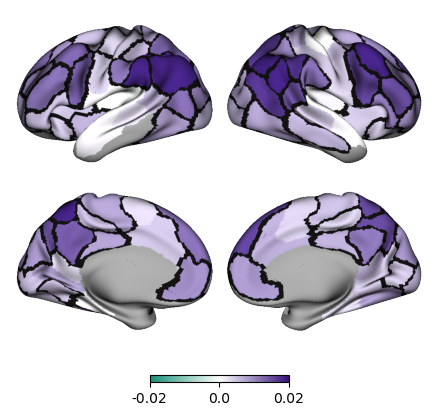

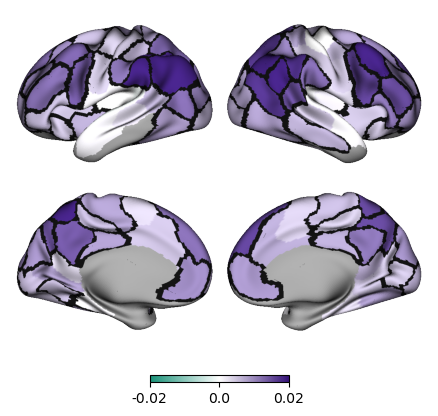

In [13]:
# then plot the rest of the brain

new_array = map_values_to_atlas(atlas_surf, np.array(vals))

translucent_map = make_translucent_map(new_array, np.nanmax(np.abs(new_array))*.20, new_array)
translucent_map 

p = Plot(lh, rh, views=['lateral', 'medial'])

p.add_layer(translucent_map , cbar=True, cmap=homemade_diverging_purple, color_range=(-.025, .025), zero_transparent=False)

#Adding contours to the significant regions! 
# for region in p_regions:
#     p_plot = [0] * 100
#     p_plot[region] = 1  
#     p_array = map_values_to_atlas(atlas_surf, p_plot)
    
#     p.add_layer(p_array, cmap=blue_cmap, as_outline=True, cbar=False, outline_thickness=2)

for region in q_regions:
    q_plot = [0] * 100
    q_plot[region] = 1  # Mark the current region
    q_array = map_values_to_atlas(atlas_surf, q_plot)
    
    p.add_layer(q_array, cmap=black_cmap, as_outline=True, cbar=False, outline_thickness=2)


a = p.build()
fig = p.build()  
fig.savefig('../../plots/Fig1._situationmodel/02._pre-post-twist_fig.png', dpi=300)
